# Lab 6: Unsupervised Learning II - Dimensionality Reduction

In this lab, we will cover the following topics:
1. Dimensionality reduction techniques:
   * PCA
   * t-SNE
   * UMAP
2. Visualization and interpretation

Each section includes basic implementation and questions for further exploration.

## 1. Dimensionality Reduction

### 1.1 Principal Component Analysis (PCA)

We will start by implementing PCA for dimensionality reduction. We will also explore different parameters and visualize the results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [3]:
load_iris?
PCA?

Init signature:
PCA(
    n_components=None,
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    n_oversamples=10,
    power_iteration_normalizer='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

With sparse inputs, the ARPACK implementation of the truncated SVD can be
used (i.e. through :func:`scipy.sparse.linalg.svds`). Alternatively, one
may consider :class:`TruncatedSVD` where the data are not centered.

Notice that this class only supports sparse inputs for some solvers such as
"arpack" and "c

In [5]:
# Load the Iris dataset
iris = load_iris()

X = iris.data
y = iris.target

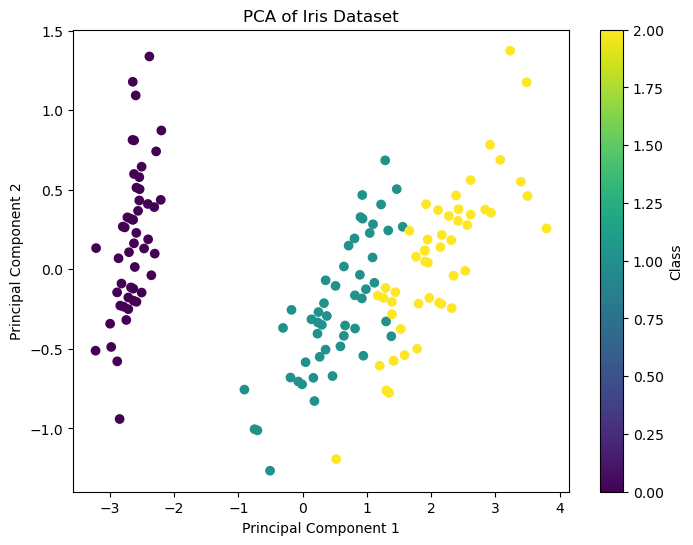

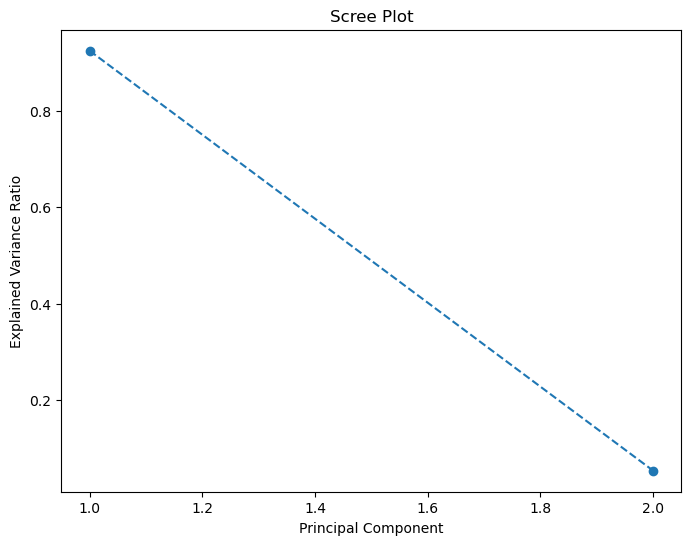

In [6]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Class')
plt.show()

# Scree plot
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

### Questions for Exploration

1. How does changing the number of principal components (`n_components`) affect the explained variance ratio?
2. What happens to the visualization when you use more or fewer principal components?
3. How does the choice of dataset affect the PCA results and their interpretation?

### 1.2 t-Distributed Stochastic Neighbor Embedding (t-SNE)

Next, we will implement t-SNE for dimensionality reduction. We will also explore different parameters and visualize the results.

In [ ]:
from sklearn.manifold import TSNE
TSNE?

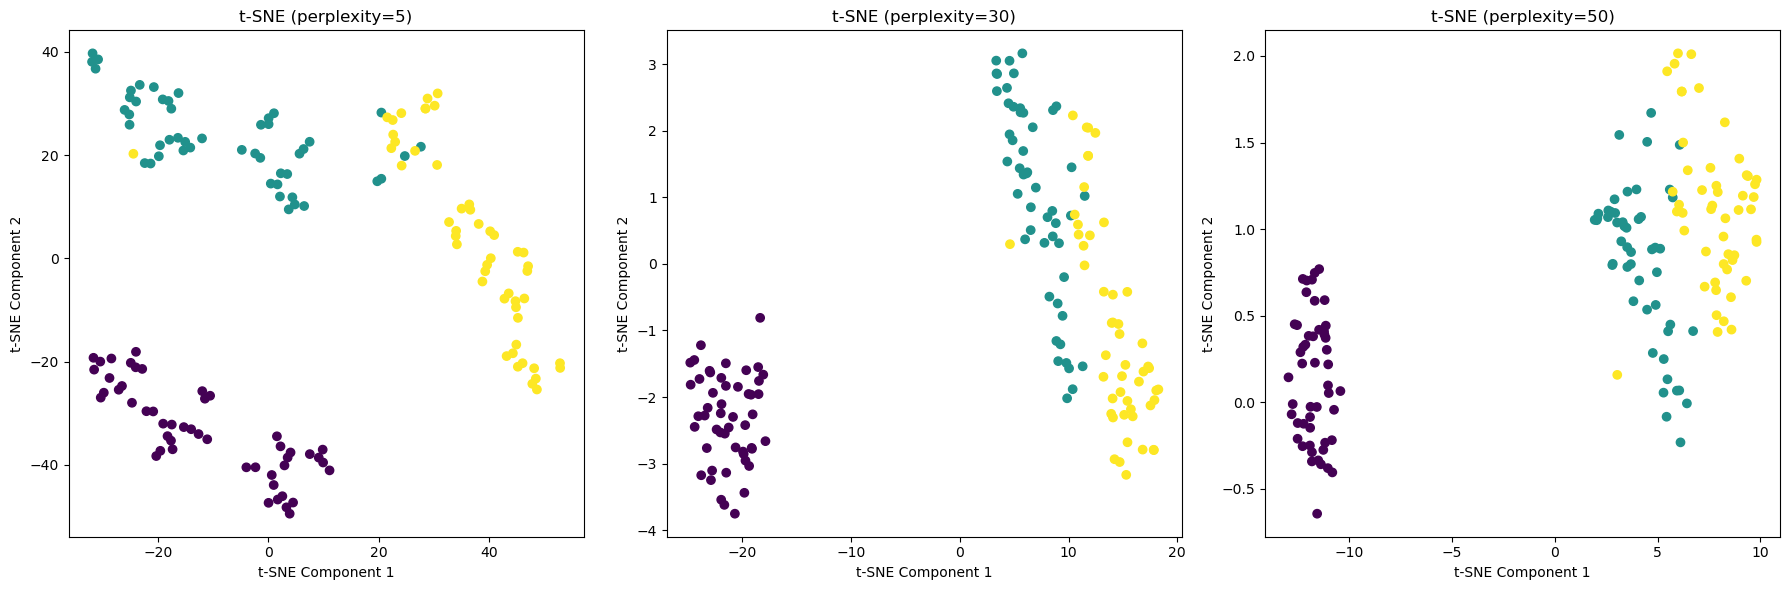

In [8]:
# Perform t-SNE with different perplexity values
perplexities = [5, 30, 50]
fig, axes = plt.subplots(1, len(perplexities), figsize=(18, 6))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f't-SNE (perplexity={perplexity})')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


### Questions for Exploration

1. How does changing the perplexity parameter affect the t-SNE visualization?
2. What happens to the visualization when you change the learning rate?
3. How does the choice of dataset affect the t-SNE results and their interpretation?

### 1.3 Uniform Manifold Approximation and Projection (UMAP)

Finally, we will implement UMAP for dimensionality reduction. We will also explore different parameters and visualize the results.

In [ ]:
import umap
umap.UMAP?

/Users/caryngeady/Documents/GitHub/BINF-5507-Winter-2026/.pixi/envs/default/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/caryngeady/Documents/GitHub/BINF-5507-Winter-2026/.pixi/envs/default/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/caryngeady/Documents/GitHub/BINF-5507-Winter-2026/.pixi/envs/default/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


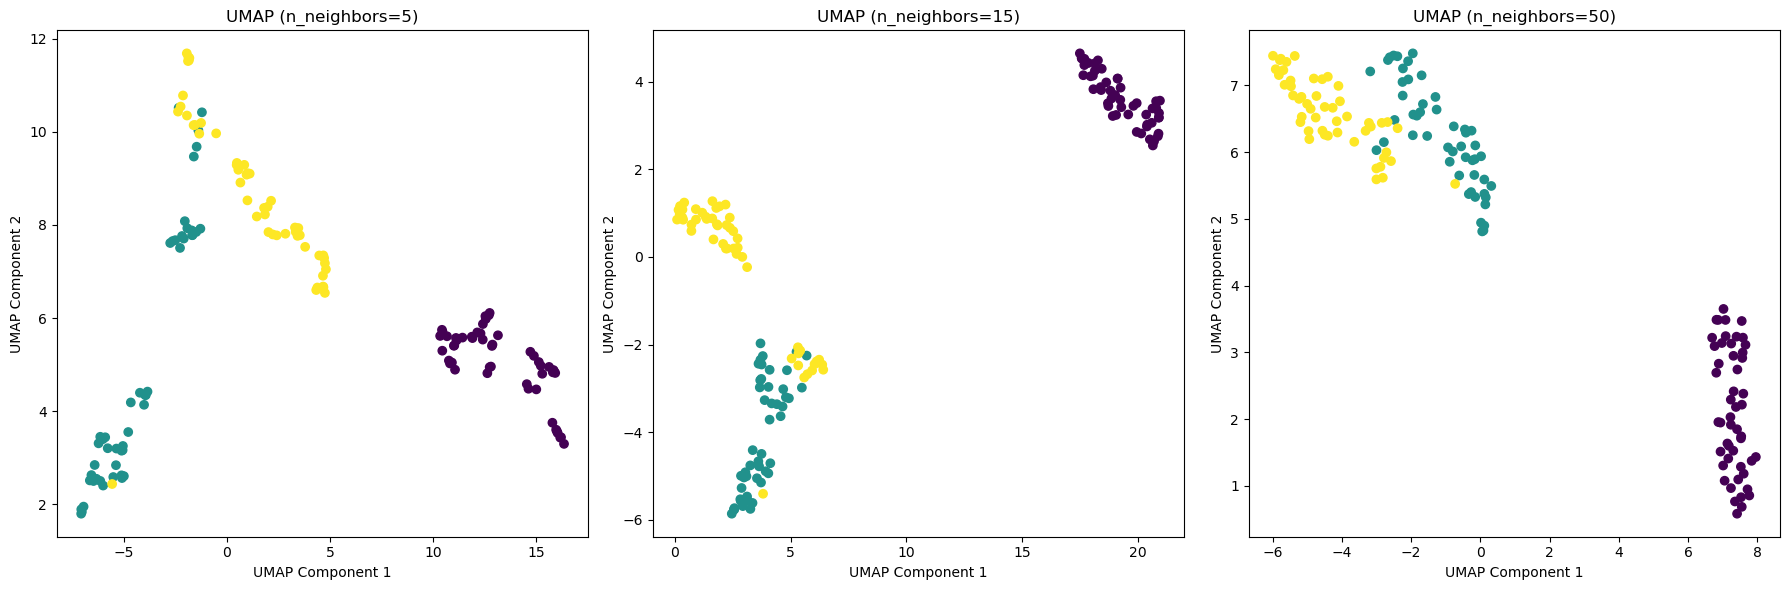

In [10]:
# Perform UMAP with different n_neighbors values
n_neighbors_values = [5, 15, 50]
fig, axes = plt.subplots(1, len(n_neighbors_values), figsize=(18, 6))

for i, n_neighbors in enumerate(n_neighbors_values):
    umap_reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, random_state=42)
    X_umap = umap_reducer.fit_transform(X)
    axes[i].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f'UMAP (n_neighbors={n_neighbors})')
    axes[i].set_xlabel('UMAP Component 1')
    axes[i].set_ylabel('UMAP Component 2')

plt.tight_layout()
plt.show()


### Questions for Exploration

1. How does changing the number of neighbors (`n_neighbors`) affect the UMAP visualization?
2. What happens to the visualization when you change the minimum distance (`min_dist`)?
3. How does the choice of dataset affect the UMAP results and their interpretation?

## 2. Visualization and Interpretation

We will visualize and interpret the results of different dimensionality reduction techniques. We will also explore different visualization techniques.

/Users/caryngeady/Documents/GitHub/BINF-5507-Winter-2026/.pixi/envs/default/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


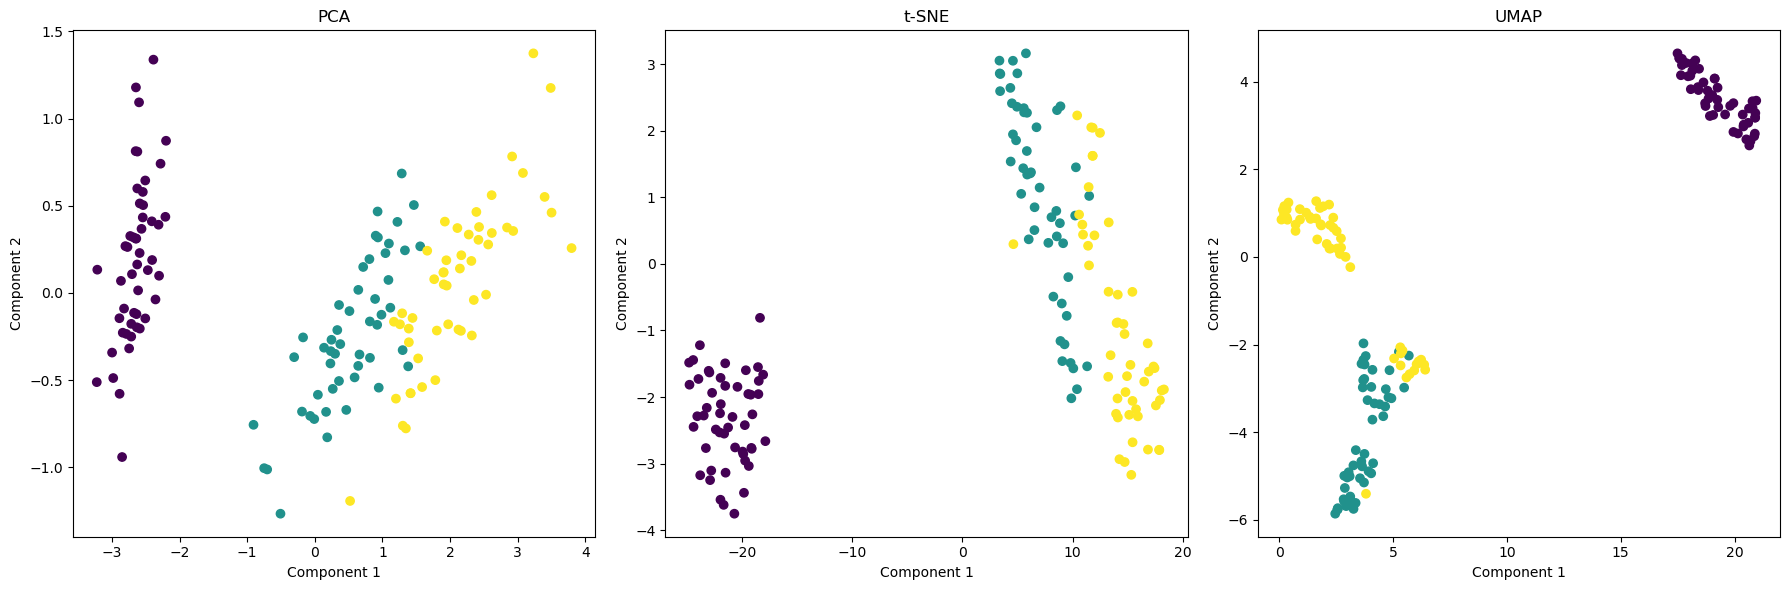

In [11]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Perform UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
axes[0].set_title('PCA')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
axes[1].set_title('t-SNE')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')

axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
axes[2].set_title('UMAP')
axes[2].set_xlabel('Component 1')
axes[2].set_ylabel('Component 2')

plt.tight_layout()
plt.show()


### Questions for Exploration

1. How do the visualizations of PCA, t-SNE, and UMAP compare?
2. What are the strengths and weaknesses of each dimensionality reduction technique?
3. How does the choice of parameters affect the visualization and interpretation of each technique?

## Extensions

1. Apply clustering algorithms (e.g., k-Means) on the reduced dimensions obtained from PCA, t-SNE, and UMAP.
    * How do the clustering results compare when using different dimensionality reduction techniques?
2. Use quantitative metrics (e.g., trustworthiness, continuity) to evaluate the quality of the dimensionality reduction.
    * How do PCA, t-SNE, and UMAP compare based on these metrics?
Handling High-Dimensional Data
3. Use PCA to reduce noise in a dataset by retaining only the top principal components.
    * How does this noise reduction affect the performance of downstream tasks (e.g., classification, clustering)?
4. Explore other dimensionality reduction techniques such as Independent Component Analysis (ICA), Linear Discriminant Analysis (LDA), and Isomap.
    * How do these techniques compare to PCA, t-SNE, and UMAP in terms of visualization and interpretation?

What we'll do now is take a second look at the clinical dataset from Lab 5 (NSCLC Radiogenomics dataset from TCIA). 

In [34]:
# IMPORTS
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.manifold import TSNE
import umap

In [16]:
clinical_data = pd.read_csv('../Lab 5/NSCLC Data/clinical.csv')
sequencing_data = pd.read_csv('../Lab 5/NSCLC Data/tpm_counts.csv')

...and we get to do the WONDERFUL task of cleaning data...yaaaaaaay

In [18]:
# 1. Remove columns that are missing TOO MUCH data
threshold_to_remove_column = 0.5
cols_to_drop = sequencing_data.columns[sequencing_data.isnull().mean() > threshold_to_remove_column]
sequencing_data.drop(columns=cols_to_drop, inplace=True)
# sequencing = sequencing.drop(cols_to_drop, axis=1) <-- depending on your version of Python

# 2. Impute missing values using KNN imputation
usubjid_rna = sequencing_data.copy()['Unnamed: 0']
sequencing_no_usubjid = sequencing_data.drop(columns=['Unnamed: 0'], axis=1)

imputer = KNNImputer(n_neighbors=5)
sequencing_imputed = imputer.fit_transform(sequencing_no_usubjid)

# 3. Isolate the clinical data that we actually have sequencing for
clinical_subset = clinical_data[clinical_data['Case ID'].isin(usubjid_rna)]

Given that we likely don't want to clean this data over and over again, we may consider saving it in its *cleaned* form.

In [19]:
sequencing_clean = pd.DataFrame(sequencing_imputed, columns=sequencing_no_usubjid.columns)
sequencing_clean.insert(0, 'Case ID', usubjid_rna)

sequencing_clean.to_csv('../Lab 5/NSCLC Data/procdata/sequencing_clean.csv', index=False)
clinical_subset.to_csv('../Lab 5/NSCLC Data/procdata/clinical_subset_w_biopsy.csv', index=False)

## PCA with Clinical Data
What we'll do is generate a skree plot using the **cleaned** sequencing dataset. The idea would be to see how many components we would need to capture at least 80% of the variance in the original data. This is not a hard and fast threshold, per se. It may vary on your dataset and goals.

In [ ]:
PCA?

In [ ]:
# Perform PCA iteratively to create a scree plot

# user-specified number of components to test
n = 100
evr = []

for i in range(1,n+1):
    pca = PCA(n_components=i)
    sequencing_pca = pca.fit_transform(sequencing_imputed)
    evr.append(pca.explained_variance_ratio_.sum())

plt.figure(figsize=(10, 5))
plt.plot(range(1,n+1), evr, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.show()

## t-SNE with Clinical Data

What we'll do is perform some hyperparameter tuning for `perplexity`, `n_components`, etc. We can try fitting a logistic classifier for a clinical variable and select optimal parameters based on model performance.

### Algorithm
- split the data into train/test
- select our modeling framework
- instantiate/fit the logistic over a series of datasets created by tuning the t-SNE parameters
- try a plot of model performance as a function of `perplexity` or `n_neighbors`

Perplexity: 3, Accuracy: 0.692, F1: 0.818
Perplexity: 5, Accuracy: 0.692, F1: 0.818
Perplexity: 7, Accuracy: 0.615, F1: 0.762


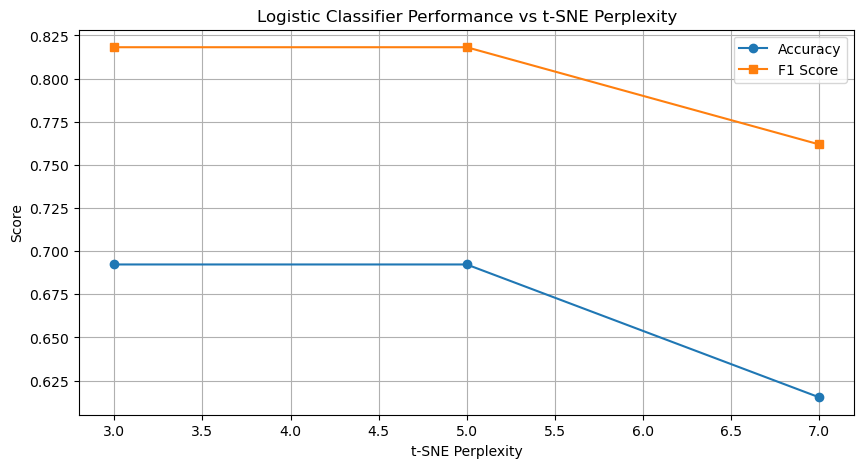

In [40]:
# Get indices for train/test split (since sequencing_imputed is a numpy array)
indices = np.arange(len(sequencing_imputed))
train_indices, test_indices = train_test_split(indices, test_size=0.2, random_state=42)

# Use the same indices to split both sequencing and clinical data
seq_train = sequencing_imputed[train_indices]
seq_test = sequencing_imputed[test_indices]
clinical_train = clinical_subset.iloc[train_indices]
clinical_test = clinical_subset.iloc[test_indices]

# Select a binary clinical characteristic for classification
clinical_target = clinical_subset['Histology '] == 'Adenocarcinoma'  # Example: binary target for adenocarcinoma vs others
y_train = clinical_target.iloc[train_indices].values
y_test = clinical_target.iloc[test_indices].values

# Test different perplexity values and evaluate logistic classifier performance
perplexities = [3, 5, 7]
results = []

for perplexity in perplexities:
    # Fit t-SNE with current perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne_train = tsne.fit_transform(seq_train)
    X_tsne_test = tsne.fit_transform(seq_test)
    
    # Standardize the t-SNE output
    scaler = StandardScaler()
    X_tsne_train_scaled = scaler.fit_transform(X_tsne_train)
    X_tsne_test_scaled = scaler.transform(X_tsne_test)
    
    # Fit logistic classifier
    lr = LogisticRegression(random_state=42, max_iter=1000)
    lr.fit(X_tsne_train_scaled, y_train)
    
    # Evaluate
    y_pred = lr.predict(X_tsne_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({'perplexity': perplexity, 'accuracy': accuracy, 'f1': f1})
    print(f"Perplexity: {perplexity}, Accuracy: {accuracy:.3f}, F1: {f1:.3f}")

# Plot results
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
plt.plot(results_df['perplexity'], results_df['accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['perplexity'], results_df['f1'], marker='s', label='F1 Score')
plt.xlabel('t-SNE Perplexity')
plt.ylabel('Score')
plt.title('Logistic Classifier Performance vs t-SNE Perplexity')
plt.legend()
plt.grid(True)
plt.show()


## UMAP with Clinical Data

What we'll is perform some hyperparameter tuning (i.e., `n_neighbors`) in a qualitative manner, where (1) we'll plot the transformed feratures in the xy-plane and (2) color the individual data points by a clinical characteristic.

### Algorithm
- loop/subplot for different `n_neighbors`
- are data points visually clustered?; if so,
    - identify clinical characteristics that are either binary or categorical which contain the same number of classes as visible clusters
    - numerically-encode clinical variable/characteristic
    - use this as a colour map

In [ ]:
umap.UMAP?

/Users/caryngeady/Documents/GitHub/BINF-5507-Winter-2026/.pixi/envs/default/lib/python3.13/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


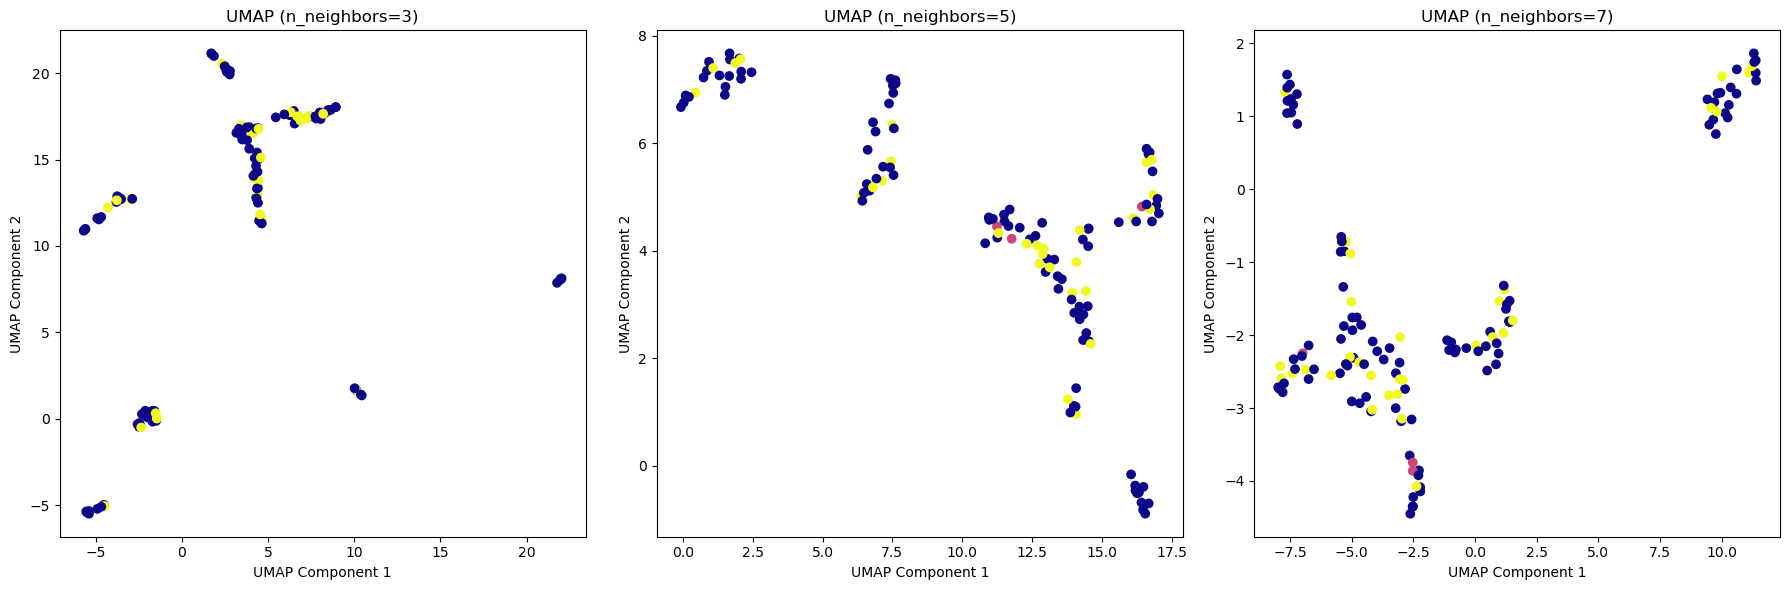

In [33]:
# define our colormpa using the selected clinical characteristic (e.g., 'Stage at Diagnosis')
clinical_characteristic = clinical_subset['Histology '].astype('category').cat.codes  # Example: color by histology type (encoded as integers)   

# Perform UMAP with different n_neighbors values
n_neighbors_values = [3, 5, 7]
fig, axes = plt.subplots(1, len(n_neighbors_values), figsize=(18, 6))

for i, n_neighbors in enumerate(n_neighbors_values):
    umap_reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, random_state=42, n_jobs=1)
    sequencing_umap = umap_reducer.fit_transform(sequencing_imputed)
    axes[i].scatter(sequencing_umap[:, 0], sequencing_umap[:, 1], c=clinical_characteristic, cmap='plasma') 
    axes[i].set_title(f'UMAP (n_neighbors={n_neighbors})')
    axes[i].set_xlabel('UMAP Component 1')
    axes[i].set_ylabel('UMAP Component 2')

plt.tight_layout()
plt.show()

In [31]:
clinical_subset.columns


Index(['Case ID', 'Patient affiliation', 'Age at Histological Diagnosis',
       'Weight (lbs)', 'Gender', 'Ethnicity', 'Smoking status', 'Pack Years',
       'Quit Smoking Year', '%GG', 'Tumor Location (choice=RUL)',
       'Tumor Location (choice=RML)', 'Tumor Location (choice=RLL)',
       'Tumor Location (choice=LUL)', 'Tumor Location (choice=LLL)',
       'Tumor Location (choice=L Lingula)', 'Tumor Location (choice=Unknown)',
       'Histology ', 'Pathological T stage', 'Pathological N stage',
       'Pathological M stage', 'Histopathological Grade',
       'Lymphovascular invasion',
       'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Recurrence', 'Recurrence Location', 'Date of Recurrence',
       'Date of Last Known Alive', 'Survival Status', 'Date of Death',
       'Time to Death (days)', 'CT Date', 'Days between CT and sur